In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df= pd.read_excel('output_params_density.xlsx')



data= df.drop('density',axis='columns')
target= df['density']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data = data_scaled, columns =['Ni', 'Al', 'Co', 'Fe', 'Cr', 'Δsₘᵢₓ', 'VEC', 'δ', 'Δχ', 'ΔHₘᵢₓ', 'Ω','Tm'])


from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(data,target,test_size=0.2,random_state=42)

In [2]:
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
# xtrain= xtrain.to_numpy()
# xtest = xtest.to_numpy()
# ytrain= ytrain.to_numpy()
# ytest = ytest.to_numpy()

In [4]:
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(0)

In [5]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [6]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    clf = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            clf.add(Dense(first_layer_nodes,input_dim=12, activation=activation_func))
        else:
            clf.add(Dense(n_nodes[i-1], activation=activation_func))
            
    #Final layer
    clf.add(Dense(1))
    clf.compile(optimizer='adam', loss=loss_func, metrics = ['mae'])
    
    return clf

#Wrap model/classifier into scikit-learn
clf =  KerasRegressor(build_fn=createmodel, verbose = True)

In [7]:
##############################################  BEST PARAMS  ###################################################################
# {'activation_func': ['relu', 'elu'],
#                          'batch_size': [1000], 'epochs': [300],
#                          'first_layer_nodes': [128, 256, 512],
#                          'last_layer_nodes': [16, 32, 64], 'loss_func': ['mse'],
#                          'n_layers': [7, 8, 9]}


# {'activation_func': 'relu',
#  'batch_size': 1000,
#  'epochs': 300,
#  'first_layer_nodes': 512,
#  'last_layer_nodes': 32,
#  'loss_func': 'mse',
#  'n_layers': 8}

In [8]:
activation_funcs = ['relu'] 
loss_funcs = ['mse']
param_grid = dict(n_layers=[8], first_layer_nodes = [512], last_layer_nodes = [32],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [1000], epochs = [300])
grid = GridSearchCV(estimator = clf, param_grid = param_grid)

In [9]:
grid.fit(xtrain,ytrain)

Epoch 1/300
9/9 [==============================] - 3s 9ms/step - loss: 48747244.0000 - mae: 6968.5391
Epoch 2/300
9/9 [==============================] - 0s 9ms/step - loss: 46870676.0000 - mae: 6831.6069
Epoch 3/300
9/9 [==============================] - 0s 9ms/step - loss: 20288168.0000 - mae: 4031.0571
Epoch 4/300
9/9 [==============================] - 0s 8ms/step - loss: 4386702.5000 - mae: 1791.8528
Epoch 5/300
9/9 [==============================] - 0s 9ms/step - loss: 2053680.7500 - mae: 1228.3458
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 867107.3750 - mae: 784.7031
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 408621.7812 - mae: 530.2477
Epoch 8/300
9/9 [==============================] - 0s 8ms/step - loss: 196640.0469 - mae: 356.0683
Epoch 9/300
9/9 [==============================] - 0s 9ms/step - loss: 112165.6016 - mae: 265.2531
Epoch 10/300
9/9 [==============================] - 0s 9ms/step - loss: 74504.5391 - mae: 200.74

9/9 [==============================] - 0s 8ms/step - loss: 488.2608 - mae: 15.1944
Epoch 86/300
9/9 [==============================] - 0s 9ms/step - loss: 485.1750 - mae: 15.0885
Epoch 87/300
9/9 [==============================] - 0s 13ms/step - loss: 483.0275 - mae: 15.0200
Epoch 88/300
9/9 [==============================] - 0s 9ms/step - loss: 477.9126 - mae: 14.9679
Epoch 89/300
9/9 [==============================] - 0s 9ms/step - loss: 471.8483 - mae: 14.8214
Epoch 90/300
9/9 [==============================] - 0s 8ms/step - loss: 469.1265 - mae: 14.7488
Epoch 91/300
9/9 [==============================] - 0s 8ms/step - loss: 468.5552 - mae: 14.7718
Epoch 92/300
9/9 [==============================] - 0s 8ms/step - loss: 460.9972 - mae: 14.5816
Epoch 93/300
9/9 [==============================] - 0s 9ms/step - loss: 459.3602 - mae: 14.4993
Epoch 94/300
9/9 [==============================] - 0s 9ms/step - loss: 454.8069 - mae: 14.4105
Epoch 95/300
9/9 [==============================] - 

9/9 [==============================] - 0s 9ms/step - loss: 325.7990 - mae: 10.9062
Epoch 170/300
9/9 [==============================] - 0s 9ms/step - loss: 320.1225 - mae: 10.6754
Epoch 171/300
9/9 [==============================] - 0s 8ms/step - loss: 323.1627 - mae: 10.8583
Epoch 172/300
9/9 [==============================] - 0s 8ms/step - loss: 323.4126 - mae: 10.7635
Epoch 173/300
9/9 [==============================] - 0s 8ms/step - loss: 316.9986 - mae: 10.5638
Epoch 174/300
9/9 [==============================] - 0s 8ms/step - loss: 319.1145 - mae: 10.6629
Epoch 175/300
9/9 [==============================] - 0s 8ms/step - loss: 317.2038 - mae: 10.7382
Epoch 176/300
9/9 [==============================] - 0s 10ms/step - loss: 317.0392 - mae: 10.5331
Epoch 177/300
9/9 [==============================] - 0s 12ms/step - loss: 312.8108 - mae: 10.3832
Epoch 178/300
9/9 [==============================] - 0s 8ms/step - loss: 311.6170 - mae: 10.4970
Epoch 179/300
9/9 [=======================

9/9 [==============================] - 0s 8ms/step - loss: 268.2818 - mae: 8.8875
Epoch 255/300
9/9 [==============================] - 0s 8ms/step - loss: 267.2719 - mae: 8.8930
Epoch 256/300
9/9 [==============================] - 0s 8ms/step - loss: 268.2821 - mae: 8.9018
Epoch 257/300
9/9 [==============================] - 0s 8ms/step - loss: 268.3708 - mae: 8.8786
Epoch 258/300
9/9 [==============================] - 0s 8ms/step - loss: 269.7013 - mae: 8.9998
Epoch 259/300
9/9 [==============================] - 0s 8ms/step - loss: 275.3241 - mae: 9.2851
Epoch 260/300
9/9 [==============================] - 0s 8ms/step - loss: 269.0874 - mae: 9.0787
Epoch 261/300
9/9 [==============================] - 0s 8ms/step - loss: 265.2550 - mae: 8.7576
Epoch 262/300
9/9 [==============================] - 0s 9ms/step - loss: 264.1970 - mae: 8.7493
Epoch 263/300
9/9 [==============================] - 0s 8ms/step - loss: 271.3182 - mae: 9.1055
Epoch 264/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 9ms/step - loss: 749.0965 - mae: 19.0464
Epoch 38/300
9/9 [==============================] - 0s 9ms/step - loss: 690.3155 - mae: 18.1853
Epoch 39/300
9/9 [==============================] - 0s 8ms/step - loss: 642.0111 - mae: 17.4841
Epoch 40/300
9/9 [==============================] - 0s 9ms/step - loss: 600.5602 - mae: 16.8495
Epoch 41/300
9/9 [==============================] - 0s 8ms/step - loss: 566.0992 - mae: 16.3087
Epoch 42/300
9/9 [==============================] - 0s 9ms/step - loss: 540.6552 - mae: 15.9465
Epoch 43/300
9/9 [==============================] - 0s 9ms/step - loss: 517.6628 - mae: 15.5352
Epoch 44/300
9/9 [==============================] - 0s 8ms/step - loss: 495.6103 - mae: 15.1526
Epoch 45/300
9/9 [==============================] - 0s 9ms/step - loss: 480.3388 - mae: 14.8486
Epoch 46/300
9/9 [==============================] - 0s 9ms/step - loss: 467.2618 - mae: 14.6299
Epoch 47/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 10ms/step - loss: 313.0603 - mae: 10.8653
Epoch 123/300
9/9 [==============================] - 0s 9ms/step - loss: 310.6177 - mae: 10.7298
Epoch 124/300
9/9 [==============================] - 0s 10ms/step - loss: 310.9723 - mae: 10.8511
Epoch 125/300
9/9 [==============================] - 0s 10ms/step - loss: 311.1283 - mae: 10.7409
Epoch 126/300
9/9 [==============================] - 0s 10ms/step - loss: 317.2832 - mae: 11.1009
Epoch 127/300
9/9 [==============================] - 0s 10ms/step - loss: 315.2992 - mae: 10.8439
Epoch 128/300
9/9 [==============================] - 0s 10ms/step - loss: 310.8732 - mae: 10.8132
Epoch 129/300
9/9 [==============================] - 0s 11ms/step - loss: 313.7719 - mae: 10.7562
Epoch 130/300
9/9 [==============================] - 0s 10ms/step - loss: 307.8766 - mae: 10.6740
Epoch 131/300
9/9 [==============================] - 0s 10ms/step - loss: 307.8202 - mae: 10.7459
Epoch 132/300
9/9 [================

9/9 [==============================] - 0s 9ms/step - loss: 261.5263 - mae: 9.0418
Epoch 207/300
9/9 [==============================] - 0s 9ms/step - loss: 260.5845 - mae: 9.0338
Epoch 208/300
9/9 [==============================] - 0s 9ms/step - loss: 260.7427 - mae: 9.0498
Epoch 209/300
9/9 [==============================] - 0s 9ms/step - loss: 259.5862 - mae: 8.9427
Epoch 210/300
9/9 [==============================] - 0s 9ms/step - loss: 262.2050 - mae: 9.0882
Epoch 211/300
9/9 [==============================] - 0s 9ms/step - loss: 261.6534 - mae: 9.0804
Epoch 212/300
9/9 [==============================] - 0s 9ms/step - loss: 260.9327 - mae: 8.9604
Epoch 213/300
9/9 [==============================] - 0s 9ms/step - loss: 258.3213 - mae: 8.8811
Epoch 214/300
9/9 [==============================] - 0s 9ms/step - loss: 263.3112 - mae: 9.0807
Epoch 215/300
9/9 [==============================] - 0s 9ms/step - loss: 259.9926 - mae: 8.9646
Epoch 216/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 9ms/step - loss: 250.0536 - mae: 8.7734
Epoch 292/300
9/9 [==============================] - 0s 9ms/step - loss: 239.7859 - mae: 8.0500
Epoch 293/300
9/9 [==============================] - 0s 9ms/step - loss: 232.1840 - mae: 7.7295
Epoch 294/300
9/9 [==============================] - 0s 9ms/step - loss: 231.5946 - mae: 7.7217
Epoch 295/300
9/9 [==============================] - 0s 9ms/step - loss: 238.0478 - mae: 8.1691
Epoch 296/300
9/9 [==============================] - 0s 9ms/step - loss: 231.3682 - mae: 7.7836
Epoch 297/300
9/9 [==============================] - 0s 9ms/step - loss: 232.5105 - mae: 7.6874
Epoch 298/300
9/9 [==============================] - 0s 9ms/step - loss: 236.2313 - mae: 8.1310
Epoch 299/300
9/9 [==============================] - 0s 9ms/step - loss: 237.0268 - mae: 7.9182
Epoch 300/300
3/3 [==============================] - 0s 5ms/step - loss: 282.1138 - mae: 8.7294
Epoch 1/300
9/9 [==============================] - 1s 

9/9 [==============================] - 0s 9ms/step - loss: 687.1406 - mae: 18.7149
Epoch 75/300
9/9 [==============================] - 0s 9ms/step - loss: 675.1620 - mae: 18.4970
Epoch 76/300
9/9 [==============================] - 0s 9ms/step - loss: 668.5825 - mae: 18.4670
Epoch 77/300
9/9 [==============================] - 0s 9ms/step - loss: 655.5697 - mae: 18.3227
Epoch 78/300
9/9 [==============================] - 0s 9ms/step - loss: 646.4151 - mae: 18.1665
Epoch 79/300
9/9 [==============================] - 0s 9ms/step - loss: 629.9492 - mae: 17.8613
Epoch 80/300
9/9 [==============================] - 0s 9ms/step - loss: 618.9017 - mae: 17.7075
Epoch 81/300
9/9 [==============================] - 0s 9ms/step - loss: 616.3724 - mae: 17.7502
Epoch 82/300
9/9 [==============================] - 0s 9ms/step - loss: 602.9853 - mae: 17.4865
Epoch 83/300
9/9 [==============================] - 0s 9ms/step - loss: 592.0552 - mae: 17.3204
Epoch 84/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 10ms/step - loss: 348.3037 - mae: 12.4015
Epoch 159/300
9/9 [==============================] - 0s 9ms/step - loss: 334.6851 - mae: 11.7843
Epoch 160/300
9/9 [==============================] - 0s 9ms/step - loss: 331.1614 - mae: 11.7260
Epoch 161/300
9/9 [==============================] - 0s 18ms/step - loss: 327.9420 - mae: 11.7053
Epoch 162/300
9/9 [==============================] - 0s 9ms/step - loss: 322.5912 - mae: 11.4805
Epoch 163/300
9/9 [==============================] - 0s 10ms/step - loss: 318.6004 - mae: 11.2872
Epoch 164/300
9/9 [==============================] - 0s 9ms/step - loss: 316.1303 - mae: 11.2544
Epoch 165/300
9/9 [==============================] - 0s 9ms/step - loss: 321.0700 - mae: 11.3602
Epoch 166/300
9/9 [==============================] - 0s 9ms/step - loss: 317.8846 - mae: 11.2989
Epoch 167/300
9/9 [==============================] - 0s 9ms/step - loss: 313.0539 - mae: 11.2192
Epoch 168/300
9/9 [======================

9/9 [==============================] - 0s 9ms/step - loss: 257.7692 - mae: 9.2461
Epoch 243/300
9/9 [==============================] - 0s 9ms/step - loss: 257.6037 - mae: 9.2788
Epoch 244/300
9/9 [==============================] - 0s 9ms/step - loss: 266.4624 - mae: 9.5865
Epoch 245/300
9/9 [==============================] - 0s 9ms/step - loss: 262.4848 - mae: 9.3701
Epoch 246/300
9/9 [==============================] - 0s 9ms/step - loss: 253.7628 - mae: 9.0200
Epoch 247/300
9/9 [==============================] - 0s 9ms/step - loss: 252.3474 - mae: 8.9498
Epoch 248/300
9/9 [==============================] - 0s 10ms/step - loss: 251.8157 - mae: 8.9094
Epoch 249/300
9/9 [==============================] - 0s 9ms/step - loss: 262.2890 - mae: 9.4135
Epoch 250/300
9/9 [==============================] - 0s 9ms/step - loss: 257.2699 - mae: 9.1422
Epoch 251/300
9/9 [==============================] - 0s 9ms/step - loss: 260.2699 - mae: 9.3587
Epoch 252/300
9/9 [==============================] - 

9/9 [==============================] - 0s 10ms/step - loss: 4484.6030 - mae: 47.7578
Epoch 26/300
9/9 [==============================] - 0s 9ms/step - loss: 4027.5559 - mae: 45.5128
Epoch 27/300
9/9 [==============================] - 0s 9ms/step - loss: 3617.9243 - mae: 42.7395
Epoch 28/300
9/9 [==============================] - 0s 9ms/step - loss: 3265.3398 - mae: 40.2262
Epoch 29/300
9/9 [==============================] - 0s 9ms/step - loss: 2950.4663 - mae: 37.8682
Epoch 30/300
9/9 [==============================] - 0s 9ms/step - loss: 2682.6113 - mae: 36.0426
Epoch 31/300
9/9 [==============================] - 0s 9ms/step - loss: 2463.4827 - mae: 34.2930
Epoch 32/300
9/9 [==============================] - 0s 9ms/step - loss: 2282.5359 - mae: 32.8243
Epoch 33/300
9/9 [==============================] - 0s 9ms/step - loss: 2105.8618 - mae: 31.5354
Epoch 34/300
9/9 [==============================] - 0s 9ms/step - loss: 1936.7557 - mae: 30.4328
Epoch 35/300
9/9 [========================

Epoch 110/300
9/9 [==============================] - 0s 10ms/step - loss: 385.9956 - mae: 12.5465
Epoch 111/300
9/9 [==============================] - 0s 9ms/step - loss: 383.6347 - mae: 12.5386
Epoch 112/300
9/9 [==============================] - 0s 9ms/step - loss: 379.9434 - mae: 12.2394
Epoch 113/300
9/9 [==============================] - 0s 9ms/step - loss: 377.8536 - mae: 12.2045
Epoch 114/300
9/9 [==============================] - 0s 9ms/step - loss: 383.2336 - mae: 12.5568
Epoch 115/300
9/9 [==============================] - 0s 9ms/step - loss: 377.3274 - mae: 12.3214
Epoch 116/300
9/9 [==============================] - 0s 9ms/step - loss: 376.4459 - mae: 12.1158
Epoch 117/300
9/9 [==============================] - 0s 9ms/step - loss: 375.9142 - mae: 12.3101
Epoch 118/300
9/9 [==============================] - 0s 9ms/step - loss: 374.7542 - mae: 12.2920
Epoch 119/300
9/9 [==============================] - 0s 9ms/step - loss: 379.7365 - mae: 12.2838
Epoch 120/300
9/9 [==========

9/9 [==============================] - 0s 9ms/step - loss: 299.7401 - mae: 9.9693
Epoch 195/300
9/9 [==============================] - 0s 9ms/step - loss: 306.9626 - mae: 10.3194
Epoch 196/300
9/9 [==============================] - 0s 9ms/step - loss: 307.6751 - mae: 10.2393
Epoch 197/300
9/9 [==============================] - 0s 9ms/step - loss: 299.2657 - mae: 9.8739
Epoch 198/300
9/9 [==============================] - 0s 9ms/step - loss: 294.0067 - mae: 9.6706
Epoch 199/300
9/9 [==============================] - 0s 9ms/step - loss: 294.5968 - mae: 9.7008
Epoch 200/300
9/9 [==============================] - 0s 10ms/step - loss: 293.0698 - mae: 9.6513
Epoch 201/300
9/9 [==============================] - 0s 9ms/step - loss: 299.1458 - mae: 9.9855
Epoch 202/300
9/9 [==============================] - 0s 9ms/step - loss: 297.4004 - mae: 9.7851
Epoch 203/300
9/9 [==============================] - 0s 10ms/step - loss: 294.7309 - mae: 9.7682
Epoch 204/300
9/9 [==============================]

9/9 [==============================] - 0s 10ms/step - loss: 272.8348 - mae: 8.9717
Epoch 280/300
9/9 [==============================] - 0s 9ms/step - loss: 272.2936 - mae: 9.0253
Epoch 281/300
9/9 [==============================] - 0s 9ms/step - loss: 261.6246 - mae: 8.4067
Epoch 282/300
9/9 [==============================] - 0s 10ms/step - loss: 262.9584 - mae: 8.4684
Epoch 283/300
9/9 [==============================] - 0s 10ms/step - loss: 263.4591 - mae: 8.5569
Epoch 284/300
9/9 [==============================] - 0s 10ms/step - loss: 263.4021 - mae: 8.5707
Epoch 285/300
9/9 [==============================] - 0s 10ms/step - loss: 266.9229 - mae: 8.6920
Epoch 286/300
9/9 [==============================] - 0s 10ms/step - loss: 273.3282 - mae: 9.1596
Epoch 287/300
9/9 [==============================] - 0s 10ms/step - loss: 284.8301 - mae: 9.3326
Epoch 288/300
9/9 [==============================] - 0s 10ms/step - loss: 291.4130 - mae: 9.7169
Epoch 289/300
9/9 [===========================

Epoch 62/300
9/9 [==============================] - 0s 10ms/step - loss: 461.1017 - mae: 14.6322
Epoch 63/300
9/9 [==============================] - 0s 10ms/step - loss: 457.3642 - mae: 14.5080
Epoch 64/300
9/9 [==============================] - 0s 10ms/step - loss: 456.7416 - mae: 14.4985
Epoch 65/300
9/9 [==============================] - 0s 10ms/step - loss: 448.4659 - mae: 14.2619
Epoch 66/300
9/9 [==============================] - 0s 10ms/step - loss: 445.8184 - mae: 14.1509
Epoch 67/300
9/9 [==============================] - 0s 10ms/step - loss: 440.9562 - mae: 14.0579
Epoch 68/300
9/9 [==============================] - 0s 10ms/step - loss: 438.6171 - mae: 13.9962
Epoch 69/300
9/9 [==============================] - 0s 10ms/step - loss: 435.5868 - mae: 13.9019
Epoch 70/300
9/9 [==============================] - 0s 10ms/step - loss: 445.9842 - mae: 14.2722
Epoch 71/300
9/9 [==============================] - 0s 10ms/step - loss: 441.5226 - mae: 13.9909
Epoch 72/300
9/9 [============

9/9 [==============================] - 0s 10ms/step - loss: 340.1119 - mae: 11.2242
Epoch 147/300
9/9 [==============================] - 0s 10ms/step - loss: 340.6056 - mae: 11.1821 0s - loss: 337.4975 - mae: 11.13
Epoch 148/300
9/9 [==============================] - 0s 9ms/step - loss: 340.3703 - mae: 11.2233
Epoch 149/300
9/9 [==============================] - 0s 10ms/step - loss: 338.9059 - mae: 11.0961
Epoch 150/300
9/9 [==============================] - 0s 10ms/step - loss: 337.4337 - mae: 11.1331
Epoch 151/300
9/9 [==============================] - 0s 10ms/step - loss: 336.7576 - mae: 11.0813
Epoch 152/300
9/9 [==============================] - 0s 10ms/step - loss: 336.3204 - mae: 11.0324
Epoch 153/300
9/9 [==============================] - 0s 10ms/step - loss: 334.2741 - mae: 10.9411
Epoch 154/300
9/9 [==============================] - ETA: 0s - loss: 346.3505 - mae: 10.95 - 0s 10ms/step - loss: 334.0605 - mae: 10.9236
Epoch 155/300
9/9 [==============================] - 0s 10ms

9/9 [==============================] - 0s 10ms/step - loss: 306.2494 - mae: 10.1690
Epoch 230/300
9/9 [==============================] - 0s 9ms/step - loss: 295.9243 - mae: 9.8363
Epoch 231/300
9/9 [==============================] - 0s 9ms/step - loss: 295.0453 - mae: 9.8105
Epoch 232/300
9/9 [==============================] - 0s 9ms/step - loss: 307.7810 - mae: 10.2228
Epoch 233/300
9/9 [==============================] - 0s 9ms/step - loss: 304.7707 - mae: 10.1869
Epoch 234/300
9/9 [==============================] - 0s 9ms/step - loss: 301.1828 - mae: 10.0051
Epoch 235/300
9/9 [==============================] - 0s 9ms/step - loss: 306.4284 - mae: 10.1536
Epoch 236/300
9/9 [==============================] - 0s 9ms/step - loss: 302.0966 - mae: 10.1183
Epoch 237/300
9/9 [==============================] - 0s 9ms/step - loss: 306.2699 - mae: 10.2198
Epoch 238/300
9/9 [==============================] - 0s 10ms/step - loss: 310.5861 - mae: 10.3836
Epoch 239/300
9/9 [=========================

11/11 [==============================] - 0s 10ms/step - loss: 741544.7500 - mae: 744.9892
Epoch 6/300
11/11 [==============================] - 0s 11ms/step - loss: 221886.2656 - mae: 388.7982
Epoch 7/300
11/11 [==============================] - 0s 11ms/step - loss: 134598.2656 - mae: 293.2280
Epoch 8/300
11/11 [==============================] - 0s 11ms/step - loss: 62120.8633 - mae: 187.9371
Epoch 9/300
11/11 [==============================] - 0s 11ms/step - loss: 37320.9180 - mae: 146.7296
Epoch 10/300
11/11 [==============================] - 0s 11ms/step - loss: 22921.9316 - mae: 111.6861
Epoch 11/300
11/11 [==============================] - 0s 12ms/step - loss: 15915.5586 - mae: 92.3543
Epoch 12/300
11/11 [==============================] - 0s 13ms/step - loss: 11744.7119 - mae: 78.7328
Epoch 13/300
11/11 [==============================] - 0s 12ms/step - loss: 9368.8711 - mae: 71.0365
Epoch 14/300
11/11 [==============================] - 0s 11ms/step - loss: 7935.3809 - mae: 66.6003


11/11 [==============================] - 0s 11ms/step - loss: 438.8917 - mae: 14.0387
Epoch 88/300
11/11 [==============================] - 0s 11ms/step - loss: 437.1814 - mae: 14.0475
Epoch 89/300
11/11 [==============================] - 0s 11ms/step - loss: 430.0787 - mae: 13.8993
Epoch 90/300
11/11 [==============================] - 0s 10ms/step - loss: 426.8120 - mae: 13.8219
Epoch 91/300
11/11 [==============================] - 0s 11ms/step - loss: 422.2479 - mae: 13.7207
Epoch 92/300
11/11 [==============================] - 0s 11ms/step - loss: 421.2574 - mae: 13.6704
Epoch 93/300
11/11 [==============================] - 0s 10ms/step - loss: 422.6060 - mae: 13.7427
Epoch 94/300
11/11 [==============================] - 0s 10ms/step - loss: 413.4796 - mae: 13.5132
Epoch 95/300
11/11 [==============================] - 0s 11ms/step - loss: 414.3490 - mae: 13.4949
Epoch 96/300
11/11 [==============================] - 0s 10ms/step - loss: 416.4385 - mae: 13.5551
Epoch 97/300
11/11 [===

11/11 [==============================] - 0s 9ms/step - loss: 310.2022 - mae: 10.4911
Epoch 170/300
11/11 [==============================] - 0s 9ms/step - loss: 315.4949 - mae: 10.7078
Epoch 171/300
11/11 [==============================] - 0s 9ms/step - loss: 315.1797 - mae: 10.7313
Epoch 172/300
11/11 [==============================] - 0s 9ms/step - loss: 322.6014 - mae: 11.0845
Epoch 173/300
11/11 [==============================] - 0s 10ms/step - loss: 306.1347 - mae: 10.4195
Epoch 174/300
11/11 [==============================] - 0s 9ms/step - loss: 304.7287 - mae: 10.2966
Epoch 175/300
11/11 [==============================] - 0s 9ms/step - loss: 302.9000 - mae: 10.2265
Epoch 176/300
11/11 [==============================] - 0s 9ms/step - loss: 303.5949 - mae: 10.3183
Epoch 177/300
11/11 [==============================] - 0s 9ms/step - loss: 301.8298 - mae: 10.2705
Epoch 178/300
11/11 [==============================] - 0s 9ms/step - loss: 303.2148 - mae: 10.3163
Epoch 179/300
11/11 [==

11/11 [==============================] - 0s 9ms/step - loss: 269.6389 - mae: 9.0142
Epoch 253/300
11/11 [==============================] - 0s 10ms/step - loss: 263.3466 - mae: 8.9099
Epoch 254/300
11/11 [==============================] - 0s 9ms/step - loss: 258.1163 - mae: 8.6440
Epoch 255/300
11/11 [==============================] - 0s 9ms/step - loss: 264.2071 - mae: 8.9047
Epoch 256/300
11/11 [==============================] - 0s 9ms/step - loss: 256.3644 - mae: 8.5351
Epoch 257/300
11/11 [==============================] - 0s 10ms/step - loss: 260.8635 - mae: 8.7131
Epoch 258/300
11/11 [==============================] - 0s 9ms/step - loss: 273.5471 - mae: 9.4309
Epoch 259/300
11/11 [==============================] - 0s 9ms/step - loss: 311.3979 - mae: 10.8932
Epoch 260/300
11/11 [==============================] - 0s 9ms/step - loss: 335.1636 - mae: 11.8157
Epoch 261/300
11/11 [==============================] - 0s 9ms/step - loss: 284.4970 - mae: 9.8540
Epoch 262/300
11/11 [=========

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000013F20412F70>,
             param_grid={'activation_func': ['relu'], 'batch_size': [1000],
                         'epochs': [300], 'first_layer_nodes': [512],
                         'last_layer_nodes': [32], 'loss_func': ['mse'],
                         'n_layers': [8]})

In [10]:
-grid.best_score_

261.67657165527345

In [11]:
grid.best_params_

{'activation_func': 'relu',
 'batch_size': 1000,
 'epochs': 300,
 'first_layer_nodes': 512,
 'last_layer_nodes': 32,
 'loss_func': 'mse',
 'n_layers': 8}

In [13]:
-grid.score(xtest, ytest)

3/3 [==============================] - 0s 4ms/step - loss: 532.8514 - mae: 14.7971


532.8514404296875

In [14]:
-grid.score(xtrain, ytrain)

11/11 [==============================] - 0s 4ms/step - loss: 447.0237 - mae: 14.7602


447.023681640625

In [15]:
ypred= grid.predict(xtest)

3/3 [==============================] - 0s 2ms/step


In [16]:
ypred

array([7420.549 , 6225.9966, 7728.0586, ..., 6225.7524, 6670.134 ,
       7230.194 ], dtype=float32)

In [17]:
ytest

12400    7409.543649
2613     6218.566811
4629     7713.533791
5524     7089.495739
10129    6790.770906
            ...     
7798     7188.929145
4093     6325.855815
9228     6221.160282
3710     6661.707565
6495     7223.403018
Name: density, Length: 2556, dtype: float64

In [18]:
# TEST SET SCORE AND ERROR
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(max_error(y_true= ytest, y_pred= ypred))
print(mean_squared_error(ytest, ypred))
print(mean_absolute_error(ytest, ypred))
print(r2_score(ytest, ypred))

518.8814088758209
532.8515274680501
14.79713296897385
0.9972493728235955


In [19]:
trainpred= grid.predict(xtrain)

11/11 [==============================] - 0s 2ms/step


In [20]:
# TRAIN SET SCORE AND ERROR

print(max_error(y_true= ytrain, y_pred= trainpred))
print(mean_squared_error(ytrain, trainpred))
print(mean_absolute_error(ytrain, trainpred))
print(r2_score(ytrain, trainpred))

321.08129075978104
447.0237006032235
14.76022604570674
0.9976070656201458


Text(0.5, 1.0, 'ARTIFICIAL NEURAL NETWORK')

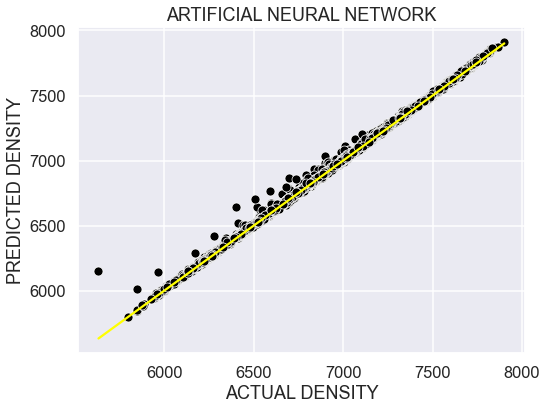

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk', font_scale=1)
sns.set_style('darkgrid')

plt.figure(figsize=(8,6))
sns.lineplot(x=ytest, y=ytest, color= 'yellow')
sns.scatterplot(x=ytest, y=ypred, color= 'black')

plt.xlabel('ACTUAL DENSITY')
plt.ylabel('PREDICTED DENSITY')
plt.title('ARTIFICIAL NEURAL NETWORK')

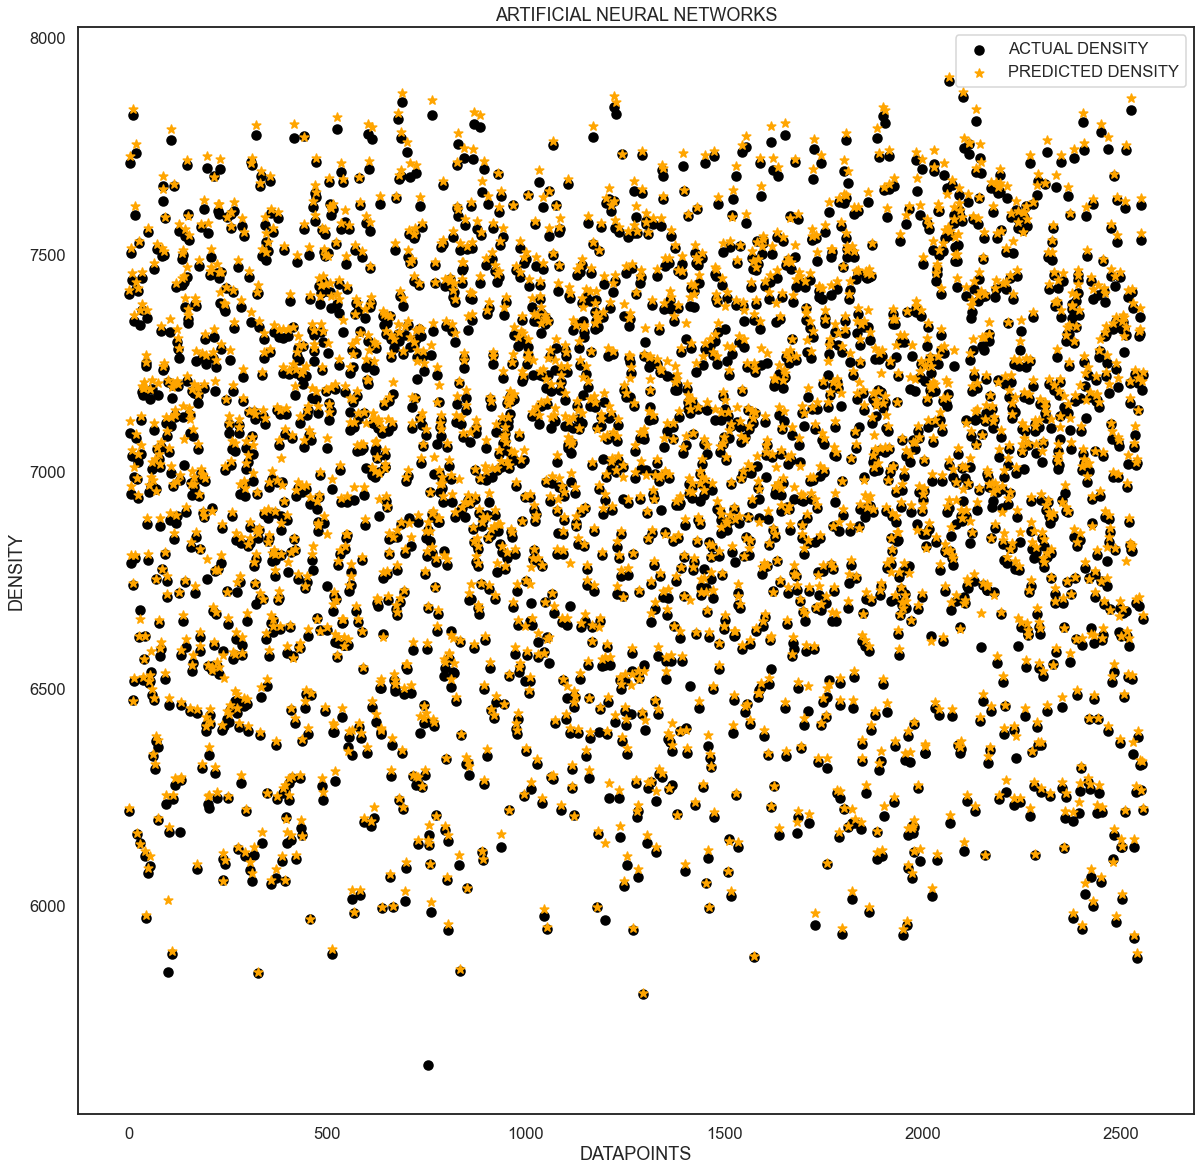

In [24]:
sns.set_style('white')
sns.set_context(font_scale=1.2)
plt.figure(figsize=(20,20))
plt.scatter(range(1,2557),ytest,c='black', marker='o')
plt.scatter(range(1,2557),ypred, c='orange', marker='*')
plt.legend(labels=['ACTUAL DENSITY','PREDICTED DENSITY'])
plt.xlabel('DATAPOINTS')
plt.ylabel('DENSITY')
plt.title('ARTIFICIAL NEURAL NETWORKS')
plt.savefig('ACTUAL_VS_PREDICTED_ANN.jpg')

11/11 [==============================] - 0s 4ms/step - loss: 129431.9297 - mae: 291.3653
          importance
Al     238066.235693
VEC    214442.885693
δ      170168.404443
Ni     167193.763818
ΔHₘᵢₓ  153642.120068
Tm     127991.560693
Co     102221.507568
Δχ      76456.062256
Fe      63518.333350
Ω       60978.953662
Cr      24071.564600
Δsₘᵢₓ   17616.866162


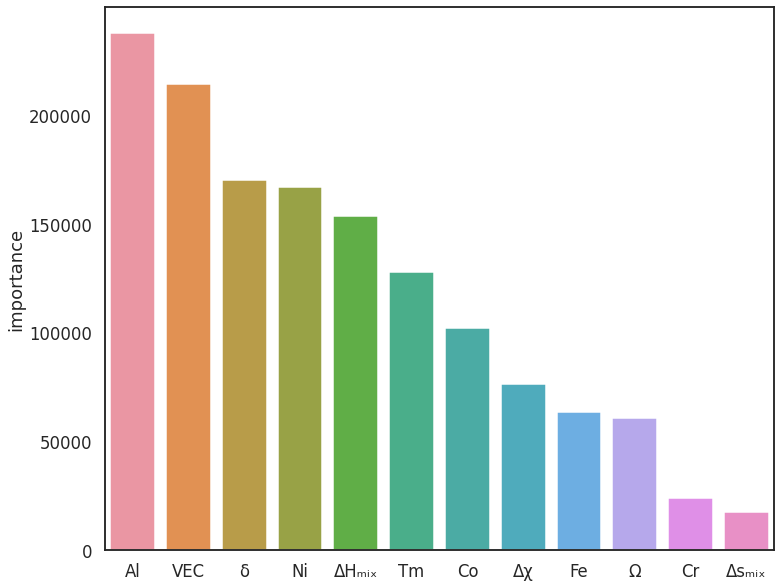

In [27]:
from sklearn.inspection import permutation_importance


pi= permutation_importance(grid, xtrain, ytrain,random_state=42)
result=pi.importances_mean

fi = pd.DataFrame(result, index= xtrain.columns, columns= ['importance']).sort_values('importance', ascending=False)

print(fi)

plt.figure(figsize=(12,10))
plt.rcParams['font.sans-serif']=['SimHei']

sns.barplot(x=fi.index,y='importance',data=fi)
plt.savefig('ANN.jpg')